# Inpurity measures experiment

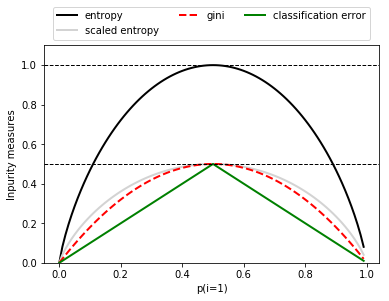

In [6]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return 2*p*(1-p)
def entropy(p):
    if p==0:
        return 0
    return -p*np.log2(p) - (1-p)*np.log2(1-p)
def error(p):
    return 1-np.max([p, 1-p])
x = np.arange(0, 1, 0.01)
ent = [entropy(p) for p in x]
sc_ent = [0.5*e for e in ent]
err = [error(p) for p in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['entropy', 'scaled entropy', 'gini', 'classification error'],
                         ['-', '-', '--', '-'],['black', 'lightgray', 'red', 'green']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Inpurity measures')
plt.show()

# Getting the dataset

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Building a model - Single DT

In [4]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

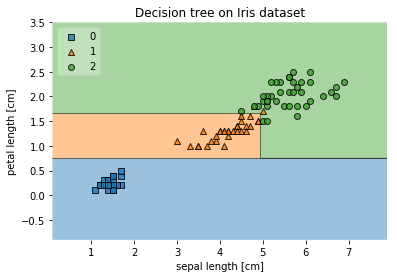

In [5]:
import my_plotter
my_plotter.plot_regions(x=X_train, y=y_train, clsf=dt,
                     xl=my_plotter.iris_xl, yl=my_plotter.iris_yl, tit='Decision tree on Iris dataset')

# Building a model - Random Forest

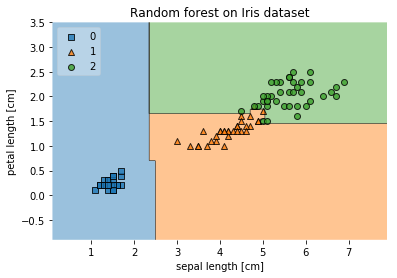

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy',
                           n_estimators=10,
                           random_state=1,
                           n_jobs=2)
rf.fit(X_train, y_train)
my_plotter.plot_regions(x=X_train, y=y_train, clsf=rf, xl=my_plotter.iris_xl, yl=my_plotter.iris_yl, tit='Random forest on Iris dataset')